# Project: Wrangling and Analyze Data

In [350]:
# import the relevant libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [351]:
# read the archive file
df_dogs = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [352]:
# download the ".tsv" file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode = "wb",) as file:
    file.write(response.content)

In [353]:
# check download success
response

<Response [200]>

In [354]:
#response.content

In [355]:
# read the file into pandas DataFrame
df_pred = pd.read_csv('image-predictions.tsv', delimiter = '\t')

In [356]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [357]:
df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [358]:
# get the data from Twitter API

#consumer_key = 'HIDDEN'

#consumer_secret = 'HIDDEN'

#access_token = 'HIDDEN'

#access_secret = 'HIDDEN'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [359]:
# get the twitter ids in a list
#list_ids = df_dogs.tweet_id

In [360]:
#list_twi = []
#for twi_id in list_ids:
#    data = api.get_status(twi_id, tweet_mode = 'extended')
#    retweets = data.get(['retweet_count'])
#    favorites = data.get(['favorite_count'])
#    list_twi.append({'tweet_id' : twi_id,
#                'retweet_count' : retweets,
#                'favorite_count' : favorites})

In [361]:
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
data = [ ]
for line in lines:
    f = json.loads(line)
    data.append({'tweet_id' : f['id'],
                'retweet_count' : f['retweet_count'],
                'favorite_count' : f['favorite_count']})
df_twi = pd.DataFrame(data)
df_twi.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### The three DataFrames are
- df_dogs
- df_pred
- df_twi

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [362]:
# check the datasets
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [363]:
df_twi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [364]:
pd.set_option('display.min_rows', 250)

In [365]:
df_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [366]:
df_pred.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1328,757400162377592832,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1,seat_belt,0.523926,False,golden_retriever,0.087800,True,Tibetan_mastiff,0.075127,True
1395,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.307794,True,fountain,0.142185,False,Chesapeake_Bay_retriever,0.113903,True
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,Pekinese,0.609853,True,Persian_cat,0.265442,False,Japanese_spaniel,0.027460,True
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781,True,Cardigan,0.411182,True,Border_collie,0.022412,True
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True
584,678969228704284672,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1,Labrador_retriever,0.680251,True,Chesapeake_Bay_retriever,0.201697,True,golden_retriever,0.019676,True
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
492,675706639471788032,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True


In [367]:
df_twi.sample(100)

,tweet_id,retweet_count,favorite_count
201,853639147608842240,11265,37198
860,762699858130116608,4190,13518
1601,685943807276412928,696,1801
206,852553447878664193,3885,17492
1809,676819651066732545,741,1957
2,891815181378084864,4328,25461
1289,708119489313951744,1102,2937
534,807059379405148160,8521,0
1445,696488710901260288,1166,2788
892,759197388317847553,2221,6725


In [368]:
df_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [369]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [370]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [371]:
# check the categories of image numbers available
df_pred['img_num'].unique()

array([1, 4, 2, 3], dtype=int64)

In [372]:
df_twi.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [373]:
# which columns are duplicated across the tables
columns_duplicates = pd.Series(list(df_dogs) + list(df_pred) + list(df_twi))
columns_duplicates[columns_duplicates.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues

**twitter archive table**
1. retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp rows are of no interest in the data analysis 

2. most important parts of the data are empty in in_reply_to_status_id and retweeted_status_user_id rows

3. drop all retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp, in_reply_to_status_id and retweeted_status_user_id which now are empty

4. twitter_id in all cases is int, change to str, since it is not for any mathematical analysis

5. timestamp should be in timestamp format and not float

6. some columns have nan values affecting the quality of the dataset

7. some dogs have multiple dog stages

8. since the results of the three dog prediction algorithms have different dog names for the same dog, they can't all be correct

9. extended url are retwwwt counts are not necessary for the data analysis

10. dog names such as 'a', 'an', 'the' might not likely be real dog names

11. img_num, doggo, floofer, pupper, puppo are incorrect datatypes

12. the tweet sources combines many entaries uneasy for human to point out

13. some rating denominators are not equal to 10

### Tidiness issues
1. doggo, floofer, pupper, puppo can be put under one column, "stage"
 
2. The three tables are separated, which can be grouped for analysis 

3. tweet_id's are duplicated in the tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [374]:
# get the datasets for cleaning
df_dogs_clean = df_dogs.copy()
df_pred_clean = df_pred.copy()
df_twi_clean = df_twi.copy()

In [375]:
# Make copies of original pieces of data


### Quality Issue #1: Dataset contains retweet_statuses (id, user_id, timestamp), not needed

#### Define: Drop the retweets and their associates and the in_reply_status_id in df_dogs

#### Code

In [376]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [377]:
# Which rows contain the retweets and their associates
df_dogs_clean[df_dogs_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [378]:
# get the dataset without the retweet rows that contain entities
df_dogs_clean = df_dogs_clean[df_dogs_clean['retweeted_status_id'].isna()]

#### Test

In [379]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality Issue #2: the in_reply_to_status has most useful contents of its cells to be empty

In [380]:
df_dogs_clean[df_dogs_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


#### Define: get the dataset without the in_reply_status and its associate rows

#### Code

In [381]:
df_dogs_clean = df_dogs_clean[df_dogs_clean['in_reply_to_status_id'].isna()]

#### Test

In [382]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Quality Issue #3: retweets_status, in_reply and their associates columns are empty (nan)

#### Define: Drop these columns

#### Code

In [383]:
df_dogs_clean = df_dogs_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                             'in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [384]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Quality Issue #4: twitter_id should be a string instead of a integer

#### Define: Convert twitter_id to a sting

#### Code

In [385]:
df_dogs_clean.tweet_id = df_dogs_clean.tweet_id.astype(str)

#### Test

In [386]:
df_dogs_clean['tweet_id'].dtype

dtype('O')

### Quality Issue #5: timestamp should be in timestamp format instead of string

#### Define: Convert timestamp to a timestamp format

#### Code

In [387]:
df_dogs_clean.timestamp = pd.to_datetime(df_dogs_clean.timestamp)

#### Test

In [388]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Quality Issue #6: doggo, floofer, pupper, and puppo contains none values

#### Define: replace the none enteries with blank spaces for easy handling

#### Code

In [389]:
# deal with the none enteries 
df_dogs_clean.doggo.replace('None', '', inplace=True)
df_dogs_clean.floofer.replace('None', '', inplace=True)
df_dogs_clean.pupper.replace('None', '', inplace=True)
df_dogs_clean.puppo.replace('None', '', inplace=True)

In [390]:
df_dogs_clean.sample(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1797,677269281705472000,2015-12-16 23:29:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,https://twitter.com/dog_rates/status/677269281705472000/photo/1,10,10,the,,,pupper,
2099,670717338665226240,2015-11-28 21:34:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed,https://twitter.com/dog_rates/status/670717338665226240/photo/1,12,10,None,,,,
1447,696488710901260288,2016-02-08 00:20:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 revolutionary af https://t.co/zKzq4nIY86,https://twitter.com/dog_rates/status/696488710901260288/photo/1,12,10,None,,,,
662,790987426131050500,2016-10-25 18:44:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Misty. She has a cowboy hat on her nose. 12/10 https://t.co/Eno0mypHIr,https://twitter.com/dog_rates/status/790987426131050500/photo/1,12,10,Misty,,,,
1574,687480748861947905,2016-01-14 03:45:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Another magnificent photo. 12/10 https://t.co/X5w387K5jr,https://twitter.com/dog_rates/status/687480748861947905/photo/1,12,10,None,,,,
417,822489057087389700,2017-01-20 17:00:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E,"https://twitter.com/dog_rates/status/822489057087389700/photo/1,https://twitter.com/dog_rates/status/822489057087389700/photo/1,https://twitter.com/dog_rates/status/822489057087389700/photo/1",13,10,Paisley,,,,
1565,688064179421470721,2016-01-15 18:24:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kilo. He's a Pouncing Brioche. Really likes snow. 11/10 https://t.co/GS76SfkraY,https://twitter.com/dog_rates/status/688064179421470721/photo/1,11,10,Kilo,,,,
1761,678675843183484930,2015-12-20 20:38:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,https://twitter.com/dog_rates/status/678675843183484930/photo/1,2,10,None,,,,
1556,688828561667567616,2016-01-17 21:01:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr,https://twitter.com/dog_rates/status/688828561667567616/photo/1,9,10,Brad,,,,
1208,715704790270025728,2016-04-01 00:58:13+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Bentley. He gives kisses back. 11/10 precious af (vid by @emmaallen25) https://t.co/9PnKkKzoUp,https://vine.co/v/ijAlDnuOD0l,11,10,Bentley,,,,


### Tidiness Issue #1: doggo, puppo, pupper, and floofer should be combined under a single column

#### Define: Combine all the dooggo, puppo, pupper, and floofer column in a single column named dog_stage

#### Code

In [391]:
# make them all into one column
df_dogs_clean['dog_stage'] = df_dogs_clean.doggo + df_dogs_clean.floofer + df_dogs_clean.pupper + df_dogs_clean.puppo

#### Test

In [392]:
df_dogs_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,,
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,,,,,
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,,,,,
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,,,,,
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,,,,,
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,,,,doggo


### Quality Issue #7: some dogs have multiple stages

In [393]:
df_dogs_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

#### Define: rewrite to separate the stages in a good format

#### Code

In [394]:
# separate the multiples stages view
df_dogs_clean.loc[df_dogs_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_dogs_clean.loc[df_dogs_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_dogs_clean.loc[df_dogs_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [395]:
# handle missing values in the dog stages
df_dogs_clean.loc[df_dogs_clean.dog_stage == '', 'dog_stage'] = np.nan

#### Test

In [396]:
df_dogs_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [397]:
# drop the doggo, floofer, pupper and puppo columns
df_dogs_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

In [398]:
# check the dropping success
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.8+ KB


In [399]:
# pd.set_option('display.max_rows', 250)

In [400]:
df_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Tidiness Issue 2: All the tables should be combined for full analysis

#### Define: use merge to combine all the tables

In [401]:
def con_to_str(filename):
    filename.tweet_id = filename.tweet_id.astype('str')
    return filename

In [402]:
con_to_str(df_pred_clean)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [403]:
con_to_str(df_twi_clean)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [404]:
### use merge to combine two tables at a time
def comb_table(table1, table2):
    df_all = pd.merge(table1, table2, on='tweet_id')
#df_all = pd.merge(df_dogs_clean, df_pred_clean, on=['tweet_id'], how = 'outer')
    return df_all

In [405]:
df_all = comb_table(df_dogs_clean, df_pred_clean)

In [406]:
# combine the last set of the tables
df_all = comb_table(df_all, df_twi_clean)

#### Test

In [407]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           303 non-null    object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   int64              
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

In [408]:
#none_names = df_all[df_all['expanded_urls'].isnull()]
#none_names

### Quality Issue 8: dog predictions and confindence levels; all the predictions algorithms cannot be correct

#### Define: Identify the most reliable dog recognition predictions and stick to it

#### Code

In [409]:
# check the prediction with most trues
df_all.p1_dog.value_counts(), df_all.p2_dog.value_counts(), df_all.p3_dog.value_counts()

(True     1463
 False     508
 Name: p1_dog, dtype: int64,
 True     1480
 False     491
 Name: p2_dog, dtype: int64,
 True     1431
 False     540
 Name: p3_dog, dtype: int64)

In [410]:
# check confidence levels of all predictions
def confidence(col_1, col_2, col_3):
    data = df_all[col_1].describe(), df_all[col_2].describe(), df_all[col_3].describe()
    return data

In [411]:
confidence('p1_conf', 'p2_conf', 'p3_conf')

(count    1971.000000
 mean        0.594558
 std         0.272126
 min         0.044333
 25%         0.363091
 50%         0.587764
 75%         0.847827
 max         1.000000
 Name: p1_conf, dtype: float64,
 count    1.971000e+03
 mean     1.345850e-01
 std      1.010527e-01
 min      1.011300e-08
 25%      5.339800e-02
 50%      1.173970e-01
 75%      1.955655e-01
 max      4.880140e-01
 Name: p2_conf, dtype: float64,
 count    1.971000e+03
 mean     6.016556e-02
 std      5.094156e-02
 min      1.740170e-10
 25%      1.608055e-02
 50%      4.944380e-02
 75%      9.153815e-02
 max      2.734190e-01
 Name: p3_conf, dtype: float64)

**Therefore, p1 has the highest confidence, despite having few false cases against p2**

In [412]:
# drop the other two prediction data columns
df_all = df_all.drop(df_all.loc[:, 'p2':'p3_dog'], axis = 1)

#### Test

In [413]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           303 non-null    object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   int64              
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

In [414]:
pd.set_option('display.max_colwidth', None)

In [415]:
df_all['expanded_urls']

0                                                                                                                                                                                                       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                                                                                                                       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                                                                                                                                                       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                                                                                                                                                       https://

### Quality Issue 9: Not interested in retweets and expanded_urls

#### Define: Drop "retweet_count" and "expanded_urls" columns

#### code

In [416]:
df_all = df_all.drop(columns = ['retweet_count', 'expanded_urls'], axis = 1)

#### Test

In [417]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           303 non-null    object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   int64              
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

### Quality Issue #10: Some dog names contains words that are unlikely and they are the only ones beginning with small letters. Words such as "the", "an", "a", "actually", etc. 

**When considered, I realised that their names are actually in the texts, so I did not drop those rows. I will consider them in my analysis**

#### Code

In [418]:
# get the unlikely names together
unlikely_names = df_all[df_all.name.str.islower()]
unlikely_names['name'].value_counts()

a               55
the              7
an               6
one              4
very             4
quite            3
just             3
getting          2
all              1
light            1
officially       1
by               1
actually         1
infuriating      1
such             1
unacceptable     1
this             1
his              1
not              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [419]:
unlikely_names['text']

21                                    I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
49             Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
134                   We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
147     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
272                                                               Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
401                    We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/1

### Quality Issue #11: Inappropriate data types

#### Define: convert dog_stage, img_num, p1_dog to categorical

#### Code

In [420]:
df_all = df_all.astype({'dog_stage' : 'category', 'img_num' : 'category', 'p1_dog' : 'category'})

#### Test

In [421]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           303 non-null    category           
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   category           
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

### Quality Issue #12: Tweet sources should be should be easily identified through perusals 

#### Define: Separate the tweet sources for easy consideration, i.e., Twitter for iPhone, Web, Android etc.

In [422]:
pd.set_option('display.max_colwidth', None)

In [423]:
df_all['source']

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
5       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
6       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
7       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
8       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
9       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
10      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

#### Define: Use regex function to extract the sources

#### code

In [424]:
# Use regex to obtain the different sources
#unique_sources = df_all['source'].apply(lambda source: re.findall(r'>(.*)<', source)[0])
#unique_sources.value_counts()

In [425]:
import re as re

In [426]:
df_all['source'] = df_all['source'].apply(lambda source: re.findall(r'>(.*)<', source)[0])

#### Test

In [427]:
df_all['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Make source categorical then

In [428]:
df_all['source'] = df_all['source'].astype('category')

#### Test

In [429]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   category           
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           303 non-null    category           
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   category           
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

### Quality Issue #13: Some rating denominators are not 10

#### Define: remove rows whose rating denominators are not 10

#### Code

In [430]:
df_all = df_all.loc[df_all.rating_denominator == 10]

#### Test

In [431]:
# This should return an empty DataFrame
df_all.loc[df_all.rating_denominator != 10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [432]:
df_all.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [433]:
# create a function to read the csv file
def get_csv_file(filename):
    df = pd.read_csv(filename)
    df.sample(100)
    return df

In [434]:
df = get_csv_file('twitter_archive_master.csv')

### Insights:
1. What are the statistics into the dogs' stages

2. Let's see the dogs the score more than 10 and those less than 10 ratings

3. Which Tweet sources tend to tweet more about dog ratings

### Insight 1

#### Code

In [435]:
# get the counts of the unique dog stages including those withour stages
df['dog_stage'].value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Insight 2

#### Code

In [436]:
#get the counts of dogs rating more than 10, and their ratings values
high_rate = df.query('rating_numerator > 10')['rating_numerator'].value_counts()
high_rate

12      446
11      392
13      253
14       33
75        1
27        1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

**:) surprised to see some dogs achieve bigger ratings that I did not see earlier in the wrangling**

In [437]:
#get the counts of dogs rating below or 10, and their ratings values
low_rate = df.query('rating_numerator <= 10')['rating_numerator'].value_counts()
low_rate

10    417
9     149
8      95
7      51
5      33
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

**): poor dogs, some scored 0**

### Insight 3

#### Code

In [438]:
df['source'].value_counts()

Twitter for iPhone    1915
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

**iPhone users tweeted the most about the dog's ratings**

### Insight 4

#### Assessing the performance of the dog prediction ML model

In [439]:
true_pred = df.query('p1_dog == True')['p1_dog'].value_counts().values
false_pred = df.query('p1_dog == False')['p1_dog'].value_counts().values
true_pred = true_pred[0]
false_pred = false_pred[0]
tot_pred = true_pred + false_pred

proportion_true_pred = true_pred/tot_pred*100
proportion_false_pred = false_pred/tot_pred*100

print('Accuracy of dog\'s prediction ML model is {:.2f}%'.format(proportion_true_pred))

Accuracy of dog's prediction ML model is 74.16%


### Visualization

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### A scatter plot of the dogs rated 10 or lower

In [442]:
rate = df['rating_numerator'].value_counts()
rate_num = df['rating_numerator'].unique().astype(str)

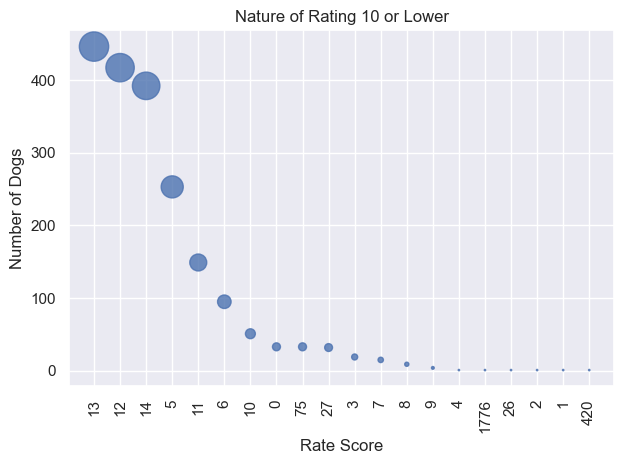

In [443]:
scale = rate
sns.set_theme(style='darkgrid')
plt.scatter(rate_num, rate, marker = 'o', color='b', s=scale, alpha = 0.8);
plt.title("Nature of Rating 10 or Lower", fontsize = 12)
plt.xlabel("Rate Score", fontsize = 12)
plt.ylabel("Number of Dogs", fontsize = 12)
plt.xticks(rate_num, rotation = 90);

plt.tight_layout()

**Observation: Rating score counts increases exponential from the lowest to the higest. Most dogs are rate 10, followed by 14, 11 and so on.**

### A pie chart representation for tweet sources

Text(0.5, 1.0, 'Pie Chart by Tweet Sources')

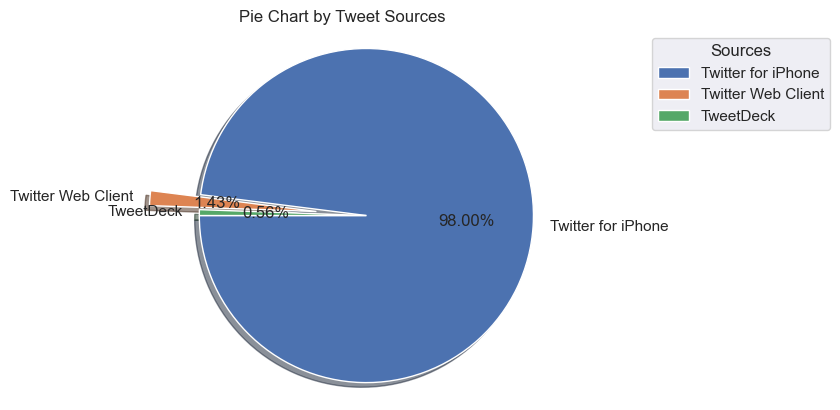

In [444]:
source_count = df['source'].value_counts()
source_index = df['source'].value_counts().index

explode = (0, 0.3, 0) 

fig, ax = plt.subplots()
ax.pie(source_count, explode=explode, labels=source_index, autopct='%1.2f%%',
        shadow=True, startangle=180) # using default color list
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.legend(source_index,
          title="Sources",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Pie Chart by Tweet Sources', fontsize = 12)


**Les't get fancy**

In [445]:
#! Credit to clcoding.com
print('\n'.join
     ([''.join
     (['Twitter for iPhone'[(x-y)%18]
     if ((x*0.05)**2 + (y*0.1)**2-1)**3-(x*0.05)**2*(y*0.1)**3 <= 0
     else ' '
     for x in range(-30, 30)])
     for y in range(15, -15, -1)]))

                                                            
                                                            
                                                            
                r iPhoneT           iPhoneTwi               
             for iPhoneTwitte   or iPhoneTwitter            
          r for iPhoneTwitter for iPhoneTwitter for         
         r for iPhoneTwitter for iPhoneTwitter for i        
        r for iPhoneTwitter for iPhoneTwitter for iPh       
         for iPhoneTwitter for iPhoneTwitter for iPho       
        for iPhoneTwitter for iPhoneTwitter for iPhon       
        or iPhoneTwitter for iPhoneTwitter for iPhone       
        r iPhoneTwitter for iPhoneTwitter for iPhoneT       
         iPhoneTwitter for iPhoneTwitter for iPhoneTw       
         PhoneTwitter for iPhoneTwitter for iPhoneTw        
          oneTwitter for iPhoneTwitter for iPhoneTw         
          neTwitter for iPhoneTwitter for iPhoneTwi         
            witter for i

In [446]:
proportion = [round(proportion_true_pred, 2), round(proportion_false_pred, 2)]
labels = df['p1_dog'].unique().astype(str)

In [447]:
labels

array(['False', 'True'], dtype='<U5')

Text(0, 0.5, 'Percentage Accuracy')

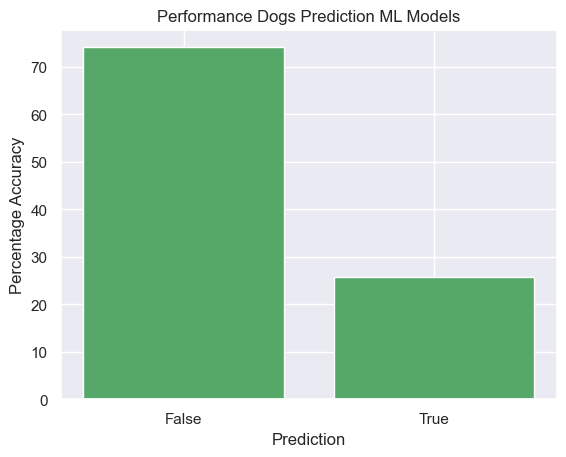

In [448]:
plt.bar(labels, proportion, color = 'g')
#plt.yticks(labels)
plt.title('Performance Dogs Prediction ML Models', fontsize = 12)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Percentage Accuracy', fontsize = 12)

### Limitations

I couldn't query the Twitter data directly from the Twiter API